In [1]:
import pandas as pd
import numpy as np
from numpy import mean
import seaborn as sns
import matplotlib.pyplot as plt
import folium
from folium.plugins import HeatMap
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LinearRegression
from sklearn.ensemble import RandomForestRegressor, GradientBoostingRegressor
from sklearn.metrics import r2_score

In [37]:
df = pd.read_csv('AB_NYC_2019.csv')
df.head(10)

,id,name,host_id,host_name,neighbourhood_group,neighbourhood,latitude,longitude,room_type,price,minimum_nights,number_of_reviews,last_review,reviews_per_month,calculated_host_listings_count,availability_365
0,2539,Clean & quiet apt home by the park,2787,John,Brooklyn,Kensington,40.64749,-73.97237,Private room,149,1,9,2018-10-19,0.21,6,365
1,2595,Skylit Midtown Castle,2845,Jennifer,Manhattan,Midtown,40.75362,-73.98377,Entire home/apt,225,1,45,2019-05-21,0.38,2,355
2,3647,THE VILLAGE OF HARLEM....NEW YORK !,4632,Elisabeth,Manhattan,Harlem,40.80902,-73.94190,Private room,150,3,0,NaN,NaN,1,365
3,3831,Cozy Entire Floor of Brownstone,4869,LisaRoxanne,Brooklyn,Clinton Hill,40.68514,-73.95976,Entire home/apt,89,1,270,2019-07-05,4.64,1,194
4,5022,Entire Apt: Spacious Studio/Loft by central park,7192,Laura,Manhattan,East Harlem,40.79851,-73.94399,Entire home/apt,80,10,9,2018-11-19,0.10,1,0
5,5099,Large Cozy 1 BR Apartment In Midtown East,7322,Chris,Manhattan,Murray Hill,40.74767,-73.97500,Entire home/apt,200,3,74,2019-06-22,0.59,1,129
6,5121,BlissArtsSpace!,7356,Garon,Brooklyn,Bedford-Stuyvesant,40.68688,-73.95596,Private room,60,45,49,2017-10-05,0.40,1,0
7,5178,Large Furnished Room Near B'way,8967,Shunichi,Manhattan,Hell's Kitchen,40.76489,-73.98493,Private room,79,2,430,2019-06-24,3.47,1,220
8,5203,Cozy Clean Guest Room - Family Apt,7490,MaryEllen,Manhattan,Upper West Side,40.80178,-73.96723,Private room,79,2,118,2017-07-21,0.99,1,0
9,5238,Cute & Cozy Lower East Side 1 bdrm,7549,Ben,Manhattan,Chinatown,40.71344,-73.99037,Entire home/apt,150,1,160,2019-06-09,1.33,4,188


In [3]:
print('Num of features: {}'.format(df.shape[1]))
print('Num of entries: {}'.format(df.shape[0]))

Num of features: 16
Num of entries: 48895


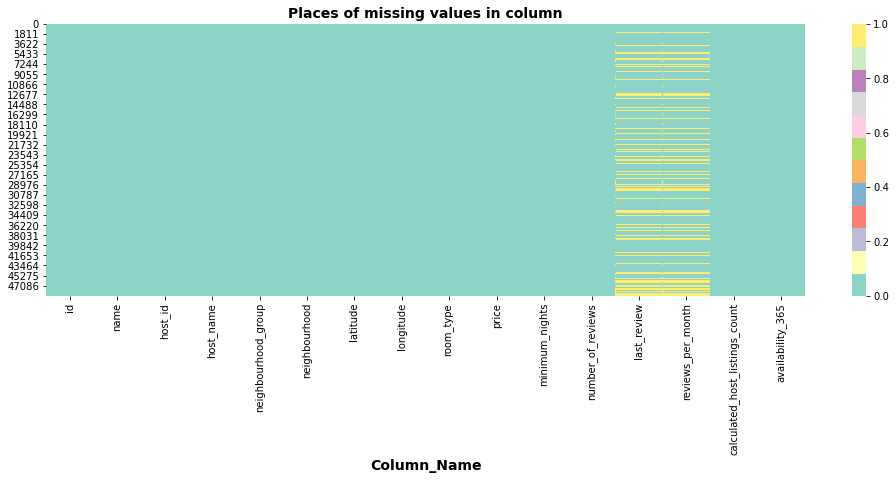

In [4]:
plt.figure(figsize=(17, 5))
sns.heatmap(df.isnull(), cbar=True, cmap='Set3')
plt.xlabel("Column_Name", size=14, weight="bold")
plt.title("Places of missing values in column",fontweight="bold",size=14)
plt.show()

In [5]:
vars_with_na=[var for var in df.columns if df[var].isnull().sum()>1] #make list of columns that have missing vals
for var in vars_with_na: #print column name and the percentage of missing values in that column
    print('column name:',var,np.round(df[var].isnull().mean(),3),'% missing values')

column name: name 0.0 % missing values
column name: host_name 0.0 % missing values
column name: last_review 0.206 % missing values
column name: reviews_per_month 0.206 % missing values


In [6]:
#columns "name" and "host_name" are irrelevant and insignificant to our data analysis.
#columns "last_review" and "review_per_month" need handling,
#"last_review" is the last date which the location was reviewed.
# if there were no reviews for the listing, date simply will not exist.
# In our case, this column is irrelevant and insignificant therefore appending those values is not needed.
# For "review_per_month" column we can simply append it with 0.0 for missing values;
# we can see that in "number_of_review" that column will have a 0, therefore following this logic with 0 total reviews
# there will be 0.0 rate of reviews per month, so in "review_per_month" well append 0.0. 
# Therefore, let's proceed with removing columns that are not important and handling of missing data.

C:\Users\orabu\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:xlabel='neighbourhood_group', ylabel='price'>

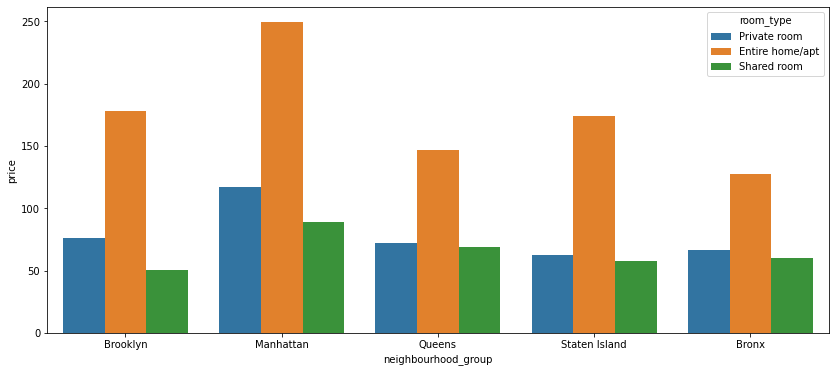

In [7]:
plt.figure(figsize=(14, 6))
sns.barplot(df.neighbourhood_group, df.price, hue=df.room_type, ci=None)
# the bar plot showcases:
#1. manhattan is most expensive neighbourhood_group
#2. price of entire home/apt is more expensive than any other room type.
#3. bronx is the cheapest.

<AxesSubplot:xlabel='longitude', ylabel='latitude'>

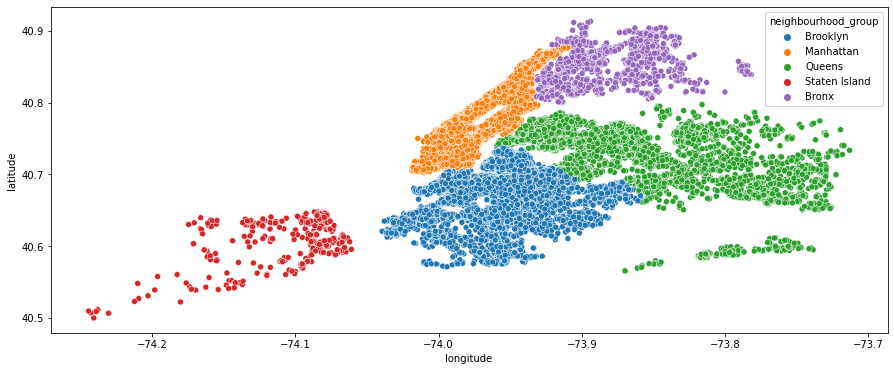

In [8]:
plt.figure(figsize=(15, 6))
sns.scatterplot(x=df.longitude,y=df.latitude,hue=df.neighbourhood_group)

In [9]:
# The above plot just describes the demogrphic view of the entries in the data and also 
# provides a clear view of the neighbourhood_groups.

In [10]:
#Distribution of Airbnb rentals in a Heat Map
m=folium.Map([40.7128,-74.0060],zoom_start=11)
HeatMap(df[['latitude','longitude']].dropna(),radius=8,gradient={0.2:'blue',0.4:'purple',0.6:'orange',1.0:'red'}).add_to(m)
display(m)


C:\Users\orabu\anaconda3\lib\site-packages\seaborn\distributions.py:2551: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


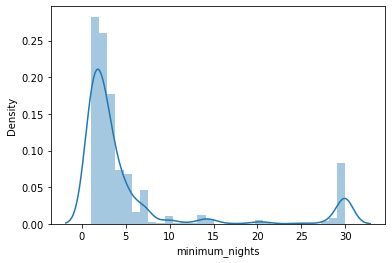

In [11]:
#Nights Booked
sns.distplot(df[(df['minimum_nights'] <= 30) & (df['minimum_nights'] > 0)]['minimum_nights'], bins=31)
plt.ioff()

In [44]:
#check the statistics of the dataset
df.describe(include='all')

,id,name,host_id,host_name,neighbourhood_group,neighbourhood,latitude,longitude,room_type,price,minimum_nights,number_of_reviews,last_review,reviews_per_month,calculated_host_listings_count,availability_365
count,4.889500e+04,48879,4.889500e+04,48874,48895,48895,48895.000000,48895.000000,48895,48895.000000,48895.000000,48895.000000,38843,38843.000000,48895.000000,48895.000000
unique,NaN,47905,NaN,11452,5,221,NaN,NaN,3,NaN,NaN,NaN,1764,NaN,NaN,NaN
top,NaN,Hillside Hotel,NaN,Michael,Manhattan,Williamsburg,NaN,NaN,Entire home/apt,NaN,NaN,NaN,2019-06-23,NaN,NaN,NaN
freq,NaN,18,NaN,417,21661,3920,NaN,NaN,25409,NaN,NaN,NaN,1413,NaN,NaN,NaN
mean,1.901714e+07,NaN,6.762001e+07,NaN,NaN,NaN,40.728949,-73.952170,NaN,152.720687,7.029962,23.274466,NaN,1.373221,7.143982,112.781327
std,1.098311e+07,NaN,7.861097e+07,NaN,NaN,NaN,0.054530,0.046157,NaN,240.154170,20.510550,44.550582,NaN,1.680442,32.952519,131.622289
min,2.539000e+03,NaN,2.438000e+03,NaN,NaN,NaN,40.499790,-74.244420,NaN,0.000000,1.000000,0.000000,NaN,0.010000,1.000000,0.000000
25%,9.471945e+06,NaN,7.822033e+06,NaN,NaN,NaN,40.690100,-73.983070,NaN,69.000000,1.000000,1.000000,NaN,0.190000,1.000000,0.000000
50%,1.967728e+07,NaN,3.079382e+07,NaN,NaN,NaN,40.723070,-73.955680,NaN,106.000000,3.000000,5.000000,NaN,0.720000,1.000000,45.000000
75%,2.915218e+07,NaN,1.074344e+08,NaN,NaN,NaN,40.763115,-73.936275,NaN,175.000000,5.000000,24.000000,NaN,2.020000,2.000000,227.000000


In [13]:
#We see that the average price is 152. Price varies between 0 to 10K

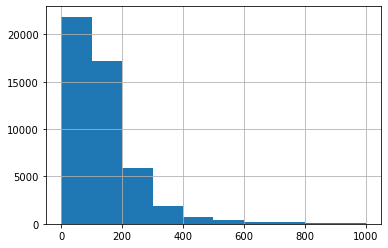

In [14]:
### Lets plot histogram for prices less than $1000
hist_price1=df["price"][df["price"]<1000].hist()

In [15]:
# Handling outliers by removing entries having price > 250
df = df[df["price"]<250]
df.head()

,id,name,host_id,host_name,neighbourhood_group,neighbourhood,latitude,longitude,room_type,price,minimum_nights,number_of_reviews,last_review,reviews_per_month,calculated_host_listings_count,availability_365
0,2539,Clean & quiet apt home by the park,2787,John,Brooklyn,Kensington,40.64749,-73.97237,Private room,149,1,9,2018-10-19,0.21,6,365
1,2595,Skylit Midtown Castle,2845,Jennifer,Manhattan,Midtown,40.75362,-73.98377,Entire home/apt,225,1,45,2019-05-21,0.38,2,355
2,3647,THE VILLAGE OF HARLEM....NEW YORK !,4632,Elisabeth,Manhattan,Harlem,40.80902,-73.94190,Private room,150,3,0,NaN,NaN,1,365
3,3831,Cozy Entire Floor of Brownstone,4869,LisaRoxanne,Brooklyn,Clinton Hill,40.68514,-73.95976,Entire home/apt,89,1,270,2019-07-05,4.64,1,194
4,5022,Entire Apt: Spacious Studio/Loft by central park,7192,Laura,Manhattan,East Harlem,40.79851,-73.94399,Entire home/apt,80,10,9,2018-11-19,0.10,1,0


In [16]:
#Data cleaning
#remove duplicates if any
df.duplicated().sum()
df.drop_duplicates(inplace=True)

In [17]:
#Drop unneceassry columns
df.drop(['name', 'id', 'host_id','last_review'], axis = 1, inplace = True)

In [18]:
df.head()

,host_name,neighbourhood_group,neighbourhood,latitude,longitude,room_type,price,minimum_nights,number_of_reviews,reviews_per_month,calculated_host_listings_count,availability_365
0,John,Brooklyn,Kensington,40.64749,-73.97237,Private room,149,1,9,0.21,6,365
1,Jennifer,Manhattan,Midtown,40.75362,-73.98377,Entire home/apt,225,1,45,0.38,2,355
2,Elisabeth,Manhattan,Harlem,40.80902,-73.94190,Private room,150,3,0,NaN,1,365
3,LisaRoxanne,Brooklyn,Clinton Hill,40.68514,-73.95976,Entire home/apt,89,1,270,4.64,1,194
4,Laura,Manhattan,East Harlem,40.79851,-73.94399,Entire home/apt,80,10,9,0.10,1,0


In [19]:
#Drop NaN values
#Since reviews_per_month column has many NaN values so lets replace them with 0 instead of removing
df.fillna({'reviews_per_month' : 0}, inplace = True)
#remove Nan from rest of the column
df.isnull().sum() #to check for null values in each column
df.dropna(how = 'any', inplace = True)

<AxesSubplot:>

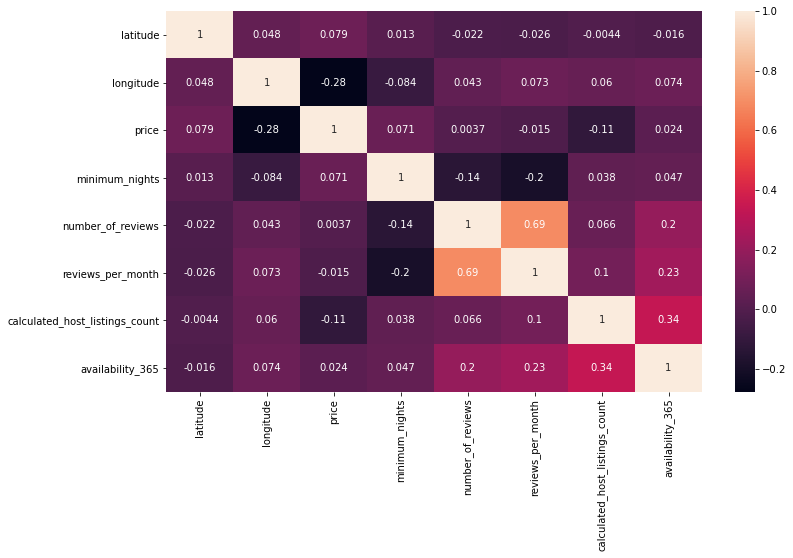

In [20]:
#Get correlation between different features
corr = df.corr(method='kendall')
plt.figure(figsize=(12,7))
sns.heatmap(corr, annot=True)

In [21]:
# Our features are not coorelated.
#Regression analysis to predict the price
#drop unneceassy columns
df.drop(['host_name','latitude','longitude','neighbourhood','number_of_reviews','reviews_per_month'],
axis = 1, inplace = True)

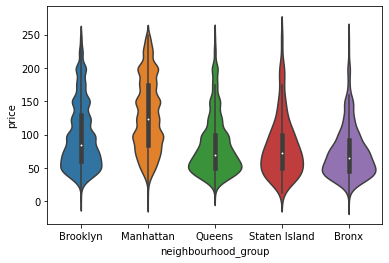

In [22]:
#Distribution of price across Manhattan,Brooklyn,Queens,Bronx & Staten Island :-
ax= sns.violinplot(x = 'neighbourhood_group',y = 'price',data = df)

<AxesSubplot:xlabel='neighbourhood_group', ylabel='price'>

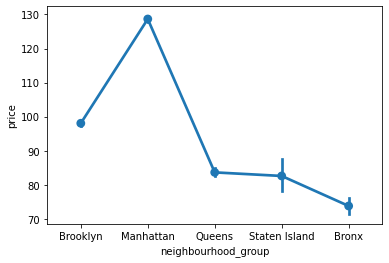

In [23]:
#exploring the average price each neighbourhood groups holds in a seaborn pointplot
sns.pointplot(x = 'neighbourhood_group', y='price', data=df, estimator=mean)

In [24]:
X = df.iloc[:,[0,1,3,4,5]]
y = df['price']
df.columns

Index(['neighbourhood_group', 'room_type', 'price', 'minimum_nights',
       'calculated_host_listings_count', 'availability_365'],
      dtype='object')

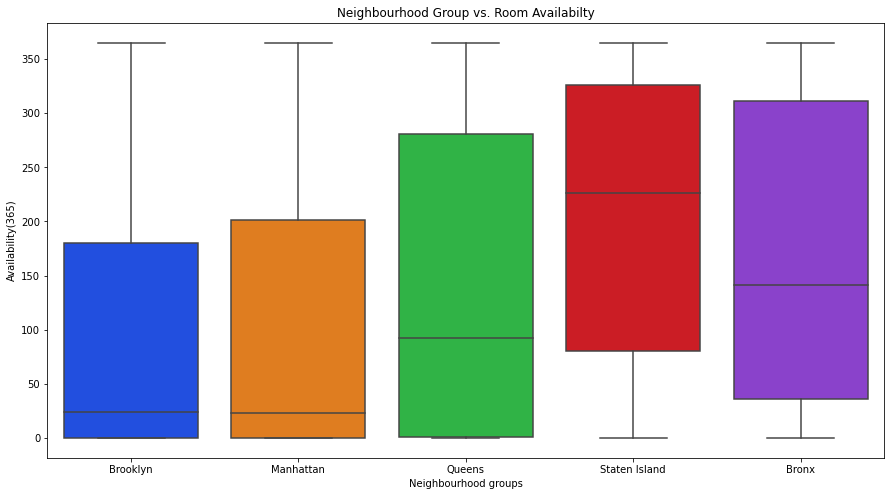

In [25]:
#lets check the room type and its relation with availability in different neighbourhoods
f,ax = plt.subplots(figsize=(15,8))
ax=sns.boxplot(x='neighbourhood_group',y='availability_365',data=df,palette="bright")
plt.title("Neighbourhood Group vs. Room Availabilty")
plt.xlabel('Neighbourhood groups')
plt.ylabel('Availability(365)')
plt.show()

In [26]:
#Label encoding
X = pd.get_dummies(X, prefix=['neighbourhood_group', 'room_type'], drop_first=True)

In [27]:
#splitting the dataset into test and training data
X_train, X_test, y_train, y_test =  train_test_split(X,y,test_size = 0.15, random_state= 0)

In [28]:
print('Dimensions of the training feature matrix: {}'.format(X_train.shape))
print('Dimensions of the training target vector: {}'.format(y_train.shape))
print('Dimensions of the test feature matrix: {}'.format(X_test.shape))
print('Dimensions of the test target vector: {}'.format(y_test.shape))

Dimensions of the training feature matrix: (36251, 9)
Dimensions of the training target vector: (36251,)
Dimensions of the test feature matrix: (6398, 9)
Dimensions of the test target vector: (6398,)


In [29]:
# Feature scaling¶
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.fit_transform(X_test)

In [30]:
#a function to visualize the difference in predicting the values vs the real values
def visualizePred(prediction, actual):    
    x1 = range(len(prediction))
    y1 = prediction["Predicted Values"]
    x2 = range(len(actual))
    y2 = actual['Actual Values']
    fig = plt.figure()
    ax = plt.axes()
    ax.plot(x1, y1)
    ax.scatter(x1, y1, label = 'predicted')
    ax.scatter(x2, y2, label = 'actual')
    plt.legend()

R2 score:  0.4967021412940398
   Actual Values  Predicted Values
0            200        155.234454
1            200         92.199635
2             50         90.576679
3             45         59.349313
4             50         66.773859


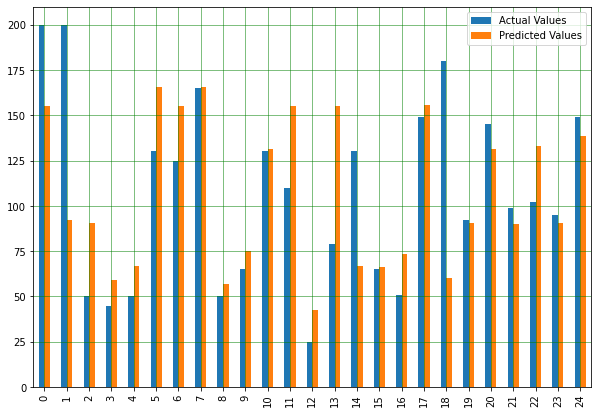

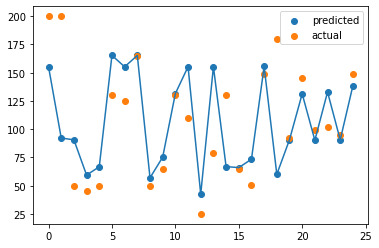

In [31]:
#Prepare a Linear Regression Model
reg = LinearRegression()
reg.fit(X_train,y_train)
y_pred = reg.predict(X_test)
#R2 score
print("R2 score: ",r2_score(y_test,y_pred))
#Error
error_diff = pd.DataFrame({'Actual Values': np.array(y_test).flatten(), 'Predicted Values': y_pred.flatten()})
print(error_diff.head(5))
#Visualize the error
df1 = error_diff.head(25)
df1.plot(kind = 'bar',figsize = (10,7))
plt.grid(which = 'major', linestyle = '-', linewidth = '0.5', color = 'green')
plt.grid(which = 'minor', linestyle = ':', linewidth = '0.5', color = 'black')
plt.show()
visualizePred(pd.DataFrame({'Predicted Values': y_pred.flatten()}).head(25), 
              pd.DataFrame({'Actual Values': np.array(y_test).flatten()}).head(25))

R2 score:  0.49845942097985996
   Actual Values  Predicted Values
0            200        154.163064
1            200         85.890037
2             50         74.905204
3             45         53.655092
4             50         66.901600


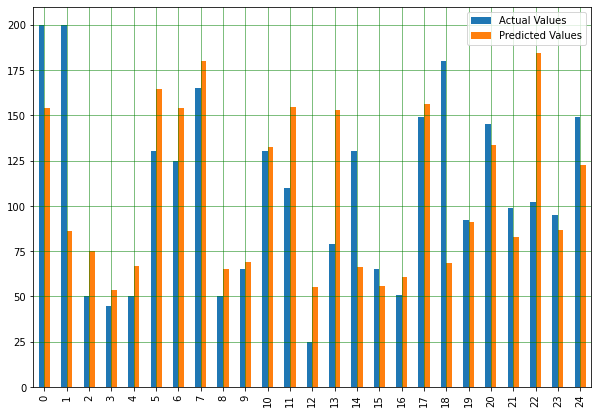

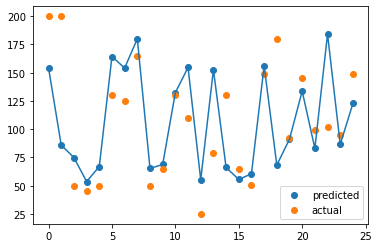

In [34]:
#Random forest regression 
regrRM2 = RandomForestRegressor(n_estimators=200, max_depth = 50, min_samples_split = 5,min_samples_leaf =4)
regrRM2.fit(X_train, y_train)

y_pred=regrRM2.predict(X_test)

print("R2 score: ",r2_score(y_test,y_pred))

#Error
error_diff = pd.DataFrame({'Actual Values': np.array(y_test).flatten(), 'Predicted Values': y_pred.flatten()})
print(error_diff.head(5))

#Visualize the error
df1 = error_diff.head(25)
df1.plot(kind='bar',figsize=(10,7))
plt.grid(which='major', linestyle='-', linewidth='0.5', color='green')
plt.grid(which='minor', linestyle=':', linewidth='0.5', color='black')
plt.show()
visualizePred(pd.DataFrame({'Predicted Values': y_pred.flatten()}).head(25), 
              pd.DataFrame({'Actual Values': np.array(y_test).flatten()}).head(25))

R2 score:  0.5236820186767019
   Actual Values  Predicted Values
0            200        153.857779
1            200         95.504342
2             50         72.846507
3             45         65.368276
4             50         67.512499


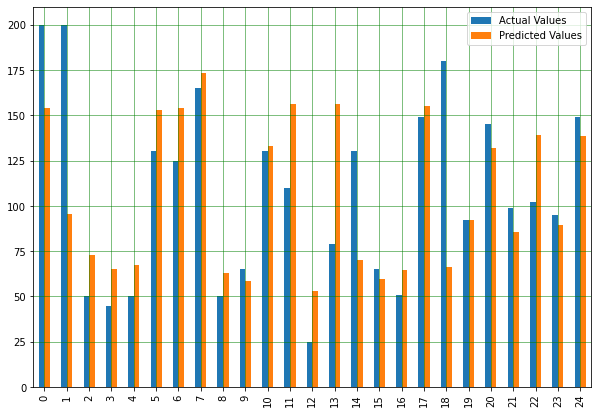

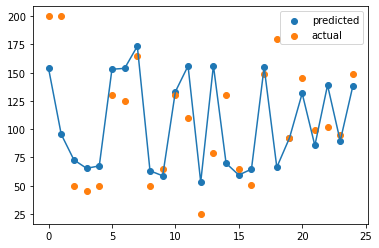

In [35]:
#Gradient Boosting Regressor
GBoost = GradientBoostingRegressor(n_estimators=3000, learning_rate=0.01)
GBoost.fit(X_train,y_train)

y_pred=GBoost.predict(X_test)

print("R2 score: ",r2_score(y_test,y_pred))

#Error
error_diff = pd.DataFrame({'Actual Values': np.array(y_test).flatten(), 'Predicted Values': y_pred.flatten()})
print(error_diff.head(5))

#Visualize the error
df1 = error_diff.head(25)
df1.plot(kind='bar',figsize=(10,7))
plt.grid(which='major', linestyle='-', linewidth='0.5', color='green')
plt.grid(which='minor', linestyle=':', linewidth='0.5', color='black')
plt.show()
visualizePred(pd.DataFrame({'Predicted Values': y_pred.flatten()}).head(25), 
              pd.DataFrame({'Actual Values': np.array(y_test).flatten()}).head(25))